<a href="https://colab.research.google.com/github/fpinto2021/Mechanical-Vibrations/blob/main/Project1Problem4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

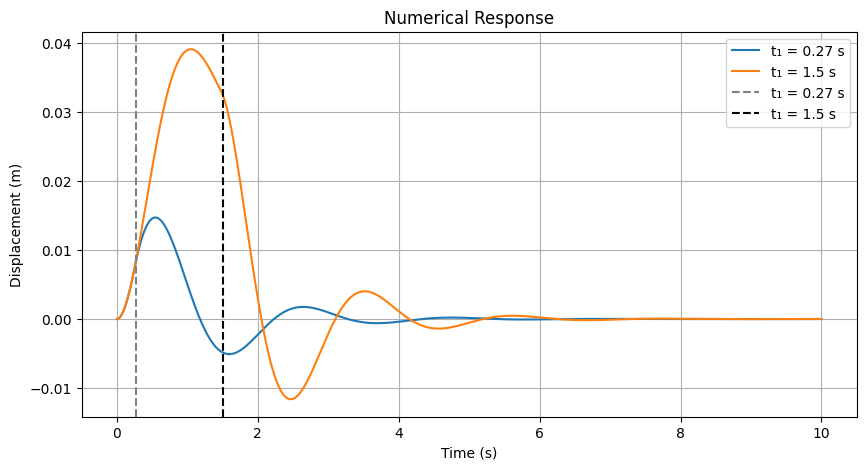

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Given parameters
S = 27
F0 = 30
k = (S * 4 + 925)
omega_n = 3.16
zeta = (S * 0.01 + 0.05)

# Computing mass and damping coefficient
m = k / omega_n**2
c = 2 * zeta * np.sqrt(m * k)

# Pulse durations
t1_values = [S / 100, 1.5]

# Time range
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# Defining the force function
def force_function(t, t1):
    if t < t1:
        return F0
    return 0

# Defining first-ordeer equations
def system(t, y, t1):
    x, v = y
    dxdt = v
    dvdt = (force_function(t, t1) - c * v - k * x) / m
    return [dxdt, dvdt]

# Initial conditions
x0 = [0, 0]

# Solving for both pulse durations
plt.figure(figsize=(10, 5))

for t1 in t1_values:
    sol = solve_ivp(system, t_span, x0, args=(t1,), t_eval=t_eval)
    plt.plot(sol.t, sol.y[0], label=f"t₁ = {t1} s")

# Plotting results
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Numerical Response")
plt.axvline(t1_values[0], color='gray', linestyle='dashed', label=f"t₁ = {t1_values[0]} s")
plt.axvline(t1_values[1], color='black', linestyle='dashed', label=f"t₁ = {t1_values[1]} s")
plt.legend()
plt.grid()
plt.show()
